#### Imports

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib, os
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50)
%matplotlib inline

#### Loading and cleaning the dataset

In [74]:
df = pd.read_csv('../assets/numerical_dataset/insurance.csv')

# convert str columns to category dtype
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [75]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [76]:
df.isnull().any().sum()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


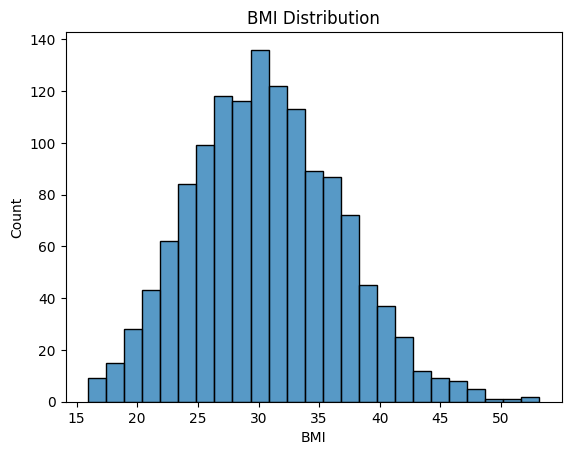

In [78]:
sns.histplot(data=df , x='bmi')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

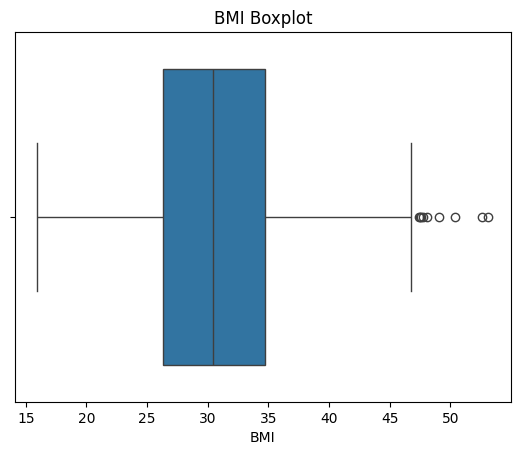

In [79]:
sns.boxplot(x='bmi', data=df)
plt.title('BMI Boxplot')
plt.xlabel('BMI')
plt.show()

#### Checking duplicates and removing them if there were any

In [80]:
# checking duplicate rows
df.duplicated().sum()

# show rows that are duplicates if there is any
df[df.duplicated()]

df["charges"].mean()

np.float64(13270.422265141257)

In [81]:
# droping the duplicate rows if there any
df.drop_duplicates(keep='first', inplace=True)

#### Handling missing values

In [82]:
# checking if there is any missing values 
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Checking for outliers

In [83]:
target_comlumn = 'bmi'
Q1 = df[target_comlumn].quantile(0.25)
Q3 = df[target_comlumn].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 2.5 * IQR
upper = Q3 + 2.5 * IQR

outlier_mask = (df[target_comlumn] < lower) | (df[target_comlumn] > upper)
outliers_bmi = df[outlier_mask]
outliers_bmi.head()

,age,sex,bmi,children,smoker,region,charges


#### Encode categorical data

In [84]:
categorical_cols = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)
    ],
    remainder='passthrough',  # Keep non-categorical columns
    verbose_feature_names_out=False # Keeps column names clean
)

preprocessor.set_output(transform="pandas") 

df_encoded = preprocessor.fit_transform(df)
df_encoded.head(10)



,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0.0,1.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,1.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,1.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,1.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,1.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520
5,0.0,0.0,0.0,1.0,0.0,31,25.740,0,3756.62160
6,0.0,0.0,0.0,1.0,0.0,46,33.440,1,8240.58960
7,0.0,0.0,1.0,0.0,0.0,37,27.740,3,7281.50560
8,1.0,0.0,0.0,0.0,0.0,37,29.830,2,6406.41070
9,0.0,0.0,1.0,0.0,0.0,60,25.840,0,28923.13692


#### Spliting the data into training datset and testing dataset

In [ ]:

TARGET = 'charges'

X = df_encoded.drop(columns=[TARGET])
y = df_encoded[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
1114,1.0,0.0,0.0,0.0,0.0,23,24.510,0
968,1.0,0.0,0.0,0.0,0.0,21,25.745,2
599,0.0,0.0,1.0,0.0,0.0,52,37.525,2
170,1.0,0.0,0.0,1.0,0.0,63,41.470,0
275,0.0,0.0,0.0,0.0,0.0,47,26.600,2


1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
Name: charges, dtype: float64

#### Training of the liner regression model

In [ ]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test RMSE: {rmse:.2f}')
print(f'Test MAE : {mae:.2f}')
print(f'Test R^2 : {r2:.4f}')



Test RMSE: 5956.34
Test MAE : 4177.05
Test R^2 : 0.8069
5-fold CV RMSEs: [6088.06041918 6174.07708129 5717.03368594 6299.30585893 6092.97881455]
CV RMSE mean: 6074.291171978072


RMSE: 5956.34
MAE : 4177.05
R^2 : 0.8069


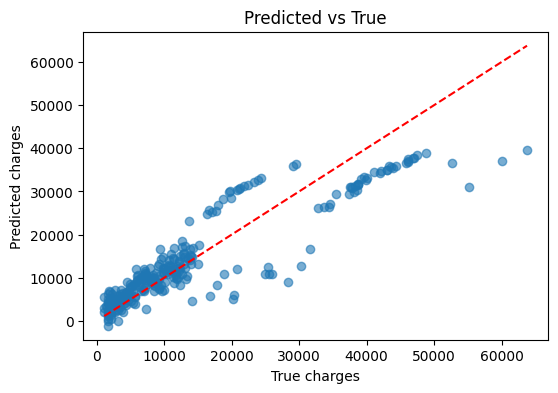

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True charges')
plt.ylabel('Predicted charges')
plt.title('Predicted vs True')
plt.show()